<a href="https://colab.research.google.com/github/Modnarudom/modProject/blob/main/ISLR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

## Q8

*    (a) Use the sm.OLS() function to perform a simple linear regression
 with mpg as the response and horsepower as the predictor. Use
 the summarize() function to print the results. Comment on the
 output. For example

  1. Is there a relationship between the predictor and the re
sponse?
  2. How strong is the relationship between the predictor and
 the response?
  3. Is the relationship between the predictor and the response
 positive or negative?
  4. What is the predicted mpg associated with a horsepower of
 98? What are the associated 95% confidence and prediction
 intervals?


*   List item



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install ISLP

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [6]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a)

<Axes: xlabel='horsepower', ylabel='mpg'>

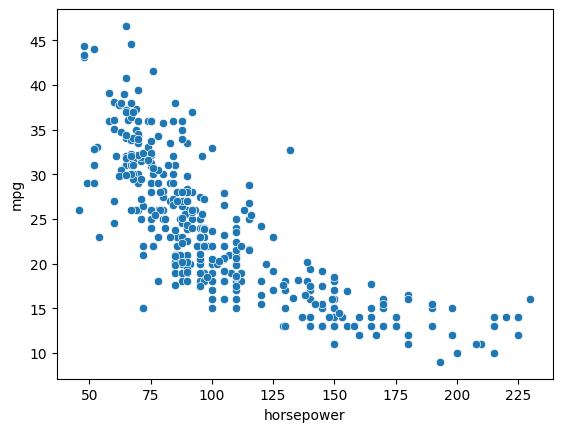

In [7]:
sns.scatterplot(data = Auto, x = 'horsepower', y = 'mpg')

In [8]:
mod = ols("mpg ~ horsepower", data = Auto).fit()

In [9]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        17:22:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [14]:
prediction = mod.predict({"horsepower": 98})
print(prediction)

0    24.467077
dtype: float64


calculate 95% confident interval [ref](https://www.statology.org/confidence-interval-mean/#:~:text=We%20use%20the%20following%20formula%20to%20calculate%20a,mean%3A%20Confidence%20Interval%20%3D%20x%20%2B%2F-%20z%2A%20%28s%2F%E2%88%9An%29)


In [25]:
#find CI
from math import sqrt
x = Auto["horsepower"]
se = np.var(x)/np.sum((x-np.mean(x))**2)
print(se)
mod.params[1]+2*se

0.002551020408163265


-0.15274269253732703

(1) From null hypothesis of $H_{0}$ : There is no relationship between **X** and **Y** ($H_{0} : \beta_{1} = 0$) <br>

versus alternative hypothesis $H_{a}$ : There is some relationship between **X** and **Y** ($H_{a} : \beta_{1} \ne 0$)<br>

If we suspect that the p-value for horsepower is close to 0, we would reject the null hypothesis ($H_{0}: \beta_{1} = 0$),<br>

indicating a significant relationship between mpg and horsepower.

(2) $R^{2}$ (R-squared) has value 0.606 or 60.6% that mpg is explained by horsepower

(3) The relationship between mpg and horsepower is negative ($\beta_{1} = -0.1578$)

<Axes: xlabel='horsepower', ylabel='mpg'>

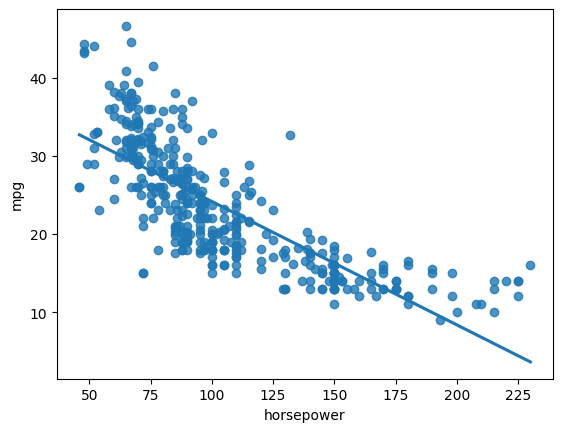

In [37]:
plt.subplots(1,1)
sns.regplot (data = Auto, x = "horsepower", y = "mpg",ci =None )
